Автор: Копылов Даниил

Институт динамики систем и теории управления им. В.М. Матросова Сибирского отделения Российской академии наук

Институт системного программирования им. В.П. Иванникова Российской академии наук

Институт математики и информационных технологий Иркутский государственный университет


In [39]:
!python -m pip install matplotlib
!python -m pip install numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

# Персептрон v1
Вход, веса, суммирование

In [3]:
class MyNeuron:
    def __init__(self, input: List["MyNeuron"]):
        self.input  = input
        self.width: List[float]

    def set_width(self, width):
        self.width = width

    def get_sign(self):
        return sum([w*neuron.get_sign() for neuron, w in zip(self.input, self.width)])


class MyInputNeuron(MyNeuron):
    def __init__(self, sign):
        self.sign = sign

    def get_sign(self):
        return self.sign

In [4]:
c1 = MyInputNeuron(1)
c2 = MyInputNeuron(0)

In [5]:
p = MyNeuron([c1, c2])

In [7]:
p.set_width([1, 1])
p.get_sign()

1

# Проектирование булевых функций

In [8]:
def test_logic(c1, c2, p):
    c_input = [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
    
    for ci in c_input:
        c1.sign = ci[0]
        c2.sign = ci[1]
        
        print(ci[0], ci[1],"|", p.get_sign())


print("\nЛогическое ИЛИ")
p.set_width([1, 1])
test_logic(c1, c2, p)

print("\nЛогическое И")
p.set_width([0.5, 0.5])
test_logic(c1, c2, p)


Логическое ИЛИ
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 2

Логическое И
0 0 | 0.0
0 1 | 0.5
1 0 | 0.5
1 1 | 1.0


# Персептрон v2
Вход, веса, суммирование, порог

In [11]:
class MyNeuron:
    def __init__(self, input: List["MyNeuron"]):
        self.input  = input
        self.width: List[float]

    def set_width(self, width):
        self.width = width

    def get_sign(self):
        z = sum([w*neuron.get_sign() for neuron, w in zip(self.input, self.width)])
        return self.activation(z)

    def activation(self, z) -> float:
        if z < 0: 
            return 0.0
        else:
            return 1.0

class MyInputNeuron(MyNeuron):
    def __init__(self, sign):
        self.sign = sign

    def get_sign(self):
        return self.sign

c1 = MyInputNeuron(1)
c2 = MyInputNeuron(0)

p = MyNeuron([c1, c2])

In [12]:
print("\nЛогическое ИЛИ")
p.set_width([1, 1])
test_logic(c1, c2, p)

print("\nЛогическое И")
p.set_width([0.5, 0.5])
test_logic(c1, c2, p)


Логическое ИЛИ
0 0 | 1.0
0 1 | 1.0
1 0 | 1.0
1 1 | 1.0

Логическое И
0 0 | 1.0
0 1 | 1.0
1 0 | 1.0
1 1 | 1.0


# Персептрон v2.1
Вход, веса, суммирование, порог, сдвиг


In [14]:
class MyNeuron:
    def __init__(self, input: List["MyNeuron"]):
        self.input  = input
        self.width: List[float]
        self.b: float

    def set_width(self, width, b):
        self.width = width
        self.b = b

    def get_sign(self):
        z = sum([w*neuron.get_sign() for neuron, w in zip(self.input, self.width)])  - self.b
        return self.activation(z)

    def activation(self, z) -> float:
        if z < 0: 
            return 0.0
        else:
            return 1.0

class MyInputNeuron(MyNeuron):
    def __init__(self, sign):
        self.sign = sign

    def get_sign(self):
        return self.sign

c1 = MyInputNeuron(1)
c2 = MyInputNeuron(0)

p = MyNeuron([c1, c2])

In [15]:
print("\nЛогическое ИЛИ")
p.set_width([1, 1], 1.0)
test_logic(c1, c2, p)

print("\nЛогическое И")
p.set_width([0.5, 0.5], 1.0)
test_logic(c1, c2, p)


Логическое ИЛИ
0 0 | 0.0
0 1 | 1.0
1 0 | 1.0
1 1 | 1.0

Логическое И
0 0 | 0.0
0 1 | 0.0
1 0 | 0.0
1 1 | 1.0


In [13]:
print("\nЛогическое Отрицание")
p.set_width([-1, 0], -0.5)
test_logic(c1, c2, p)


Логическое Отрицание
0 0 | 1.0
0 1 | 1.0
1 0 | 0.0
1 1 | 0.0


# XOR
$$xor (x, y) = (\overline{x} \wedge  y) \vee  (x \wedge \overline{y})   $$

In [17]:
p1 = MyNeuron([c1, c2])
print("\nЛогическое (НЕ x) И y")
p1.set_width([-0.5, 0.5], 0.5)
test_logic(c1, c2, p1)


Логическое (НЕ x) И y
0 0 | 0.0
0 1 | 1.0
1 0 | 0.0
1 1 | 0.0


In [18]:
p2 = MyNeuron([c1, c2])
print("\nЛогическое x И (НЕ y)")
p2.set_width([0.5, -0.5], 0.5)
test_logic(c1, c2, p2)


Логическое x И (НЕ y)
0 0 | 0.0
0 1 | 0.0
1 0 | 1.0
1 1 | 0.0


In [22]:
p3 = MyNeuron([p1, p2])
print("\nЛогическое исключающее или")
p3.set_width([1, 1], 0.0000000001)
test_logic(c1, c2, p3)


Логическое исключающее или
0 0 | 0.0
0 1 | 1.0
1 0 | 1.0
1 1 | 0.0


# Функция Хевисайда

$${\displaystyle \theta (x)={\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}}$$

In [9]:
x = MyInputNeuron(0)

theta = MyNeuron([x])
theta.set_width([1], 0)
theta.get_sign()

0

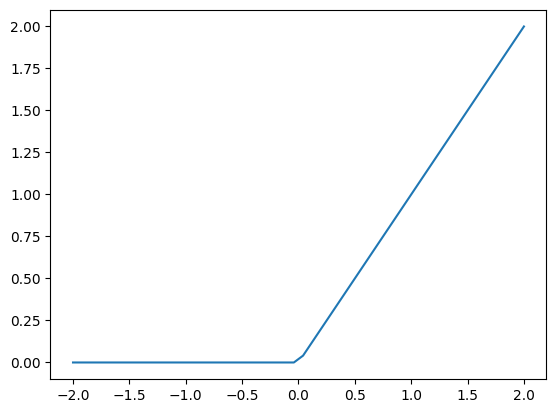

In [10]:
xx = np.linspace(-2, 2, 50)
yy = np.zeros_like(xx)
for i, xi in enumerate(xx):
    x.sign = xi
    yy[i] = theta.get_sign()

plt.plot(xx, yy)

# δ-функция Дирака

$${\displaystyle \delta (x)=\left\{{\begin{matrix}+\infty ,&x=0,\\0,&x\neq 0;\\\end{matrix}}\right.}$$

$${\displaystyle \delta (x)=\left\{{\begin{matrix}10,&x \in [0, 0.1],\\0,&x \not\in [0, 0.1];\\\end{matrix}}\right.}$$

In [11]:
theta1 = MyNeuron([x])
theta1.set_width([1], 0)

theta2 = MyNeuron([x])
theta2.set_width([1], +0.1)


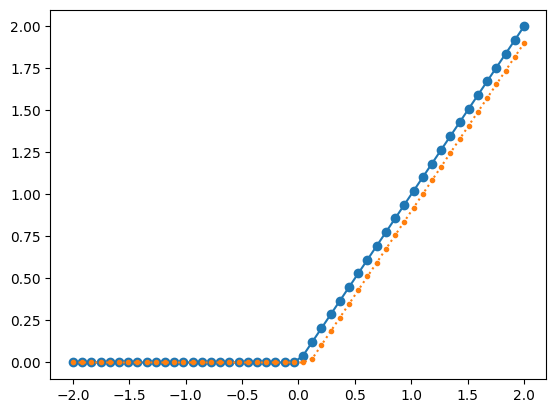

In [12]:
xx = np.linspace(-2, 2, 50)
yy1 = np.zeros_like(xx)
yy2 = np.zeros_like(xx)
for i, xi in enumerate(xx):
    x.sign = xi
    yy1[i] = theta1.get_sign()
    yy2[i] = theta2.get_sign()

plt.plot(xx, yy1, "-o")
plt.plot(xx, yy2, ":.")

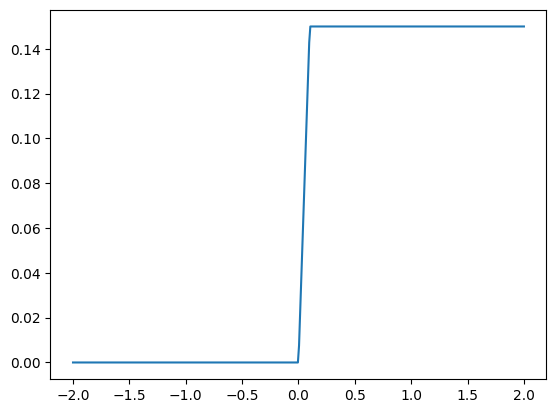

In [13]:
theta_d = MyNeuron([theta1, theta2])
theta_d.set_width([1.5, -1.5], 0.00000000001)

xx = np.linspace(-2, 2, 400)
yy = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yy[i] = theta_d.get_sign()

plt.plot(xx, yy)

# Аппроксимация функции

In [14]:
class MyNeuron:
    def __init__(self, input: List["MyNeuron"]):
        self.input  = input
        self.width: List[float]
        self.b: float

    def set_width(self, width, b):
        self.width = width
        self.b = b

    def get_sign(self):
        z = sum([w*neuron.get_sign() for neuron, w in zip(self.input, self.width)])  - self.b
        return self.activation(z)

    def activation(self, z) -> float:
        return max(0, z)                                                                      # <------

class MyInputNeuron(MyNeuron):
    def __init__(self, sign):
        self.sign = sign

    def get_sign(self):
        return self.sign

c1 = MyInputNeuron(1)
c2 = MyInputNeuron(1)

p = MyNeuron([c1, c2])
p.set_width([1, 2], 1.2)
p.get_sign()

1.8

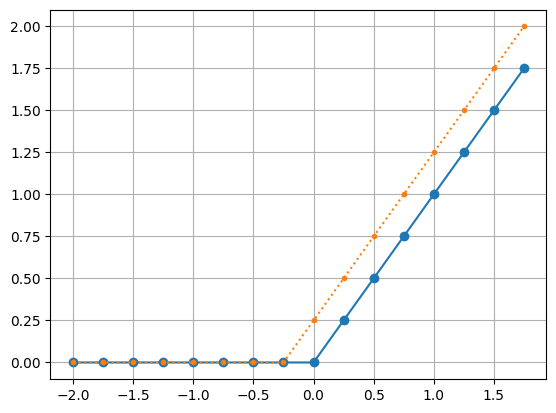

In [15]:
eps = 0.25

relu1 = MyNeuron([x])
relu1.set_width([1], 0)

relu2 = MyNeuron([x])
relu2.set_width([1], -eps)

xx = np.arange(-2, 2, eps)
yy1 = np.zeros_like(xx)
yy2 = np.zeros_like(xx)
for i, xi in enumerate(xx):
    x.sign = xi
    yy1[i] = relu1.get_sign()
    yy2[i] = relu2.get_sign()

plt.plot(xx, yy1, "o-")
plt.plot(xx, yy2, ".:")
plt.grid()

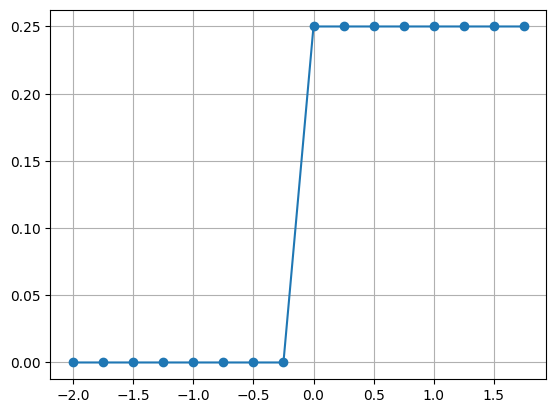

In [16]:
theta_d = MyNeuron([relu1, relu2])

theta_d.set_width([-1, 1], 0)

xx = np.arange(-2, 2, eps)
yy = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yy[i] = theta_d.get_sign()

plt.plot(xx, yy, "-o")
plt.grid()

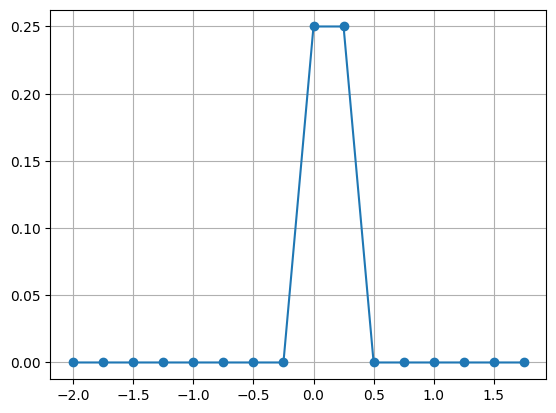

In [17]:
eps = 0.25

relu1 = MyNeuron([x])
relu1.set_width([1], -eps)

relu2 = MyNeuron([x])
relu2.set_width([1], 0)

relu3 = MyNeuron([x])
relu3.set_width([1], eps)

relu4 = MyNeuron([x])
relu4.set_width([1], 2*eps)


delta_relu = MyNeuron([relu1, relu2, relu3, relu4])
delta_relu.set_width([1, -1, -1, 1], 0)

xx = np.arange(-2, 2, eps)
yy = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yy[i] = delta_relu.get_sign()

plt.plot(xx, yy, "-o")
plt.grid()

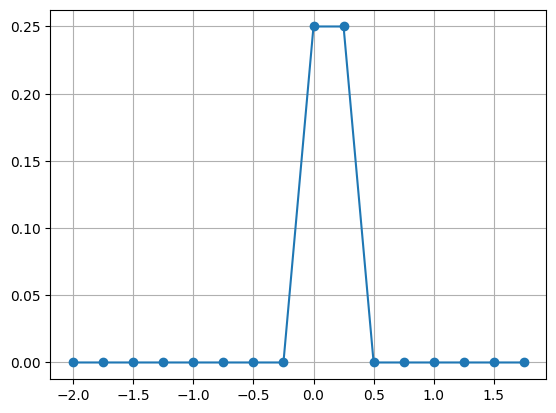

In [18]:
eps = 0.25


relu1 = MyNeuron([x])
relu1.set_width([1], -eps)

relu2 = MyNeuron([x])
relu2.set_width([1], 0)

relu3 = MyNeuron([x])
relu3.set_width([1], eps)

delta_relu = MyNeuron([relu1, relu2, relu3])
delta_relu.set_width([1, -1, -1], 0)

xx = np.arange(-2, 2, eps)
yy = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yy[i] = delta_relu.get_sign()

plt.plot(xx, yy, "-o")
plt.grid()

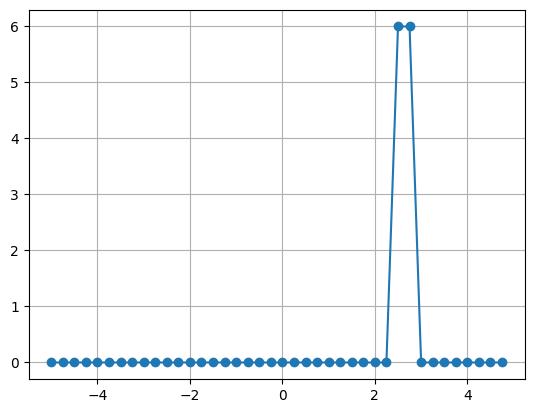

In [19]:
eps = 0.25
step = 2.5
h = 6*1/eps

relu1 = MyNeuron([x])
relu1.set_width([1], -eps+step)

relu2 = MyNeuron([x])
relu2.set_width([1], 0+step)

relu3 = MyNeuron([x])
relu3.set_width([1], eps+step)


delta_relu = MyNeuron([relu1, relu2, relu3])
delta_relu.set_width([h, -h, -h], 0)

xx = np.arange(-5, 5, eps)
yy = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yy[i] = delta_relu.get_sign()

plt.plot(xx, yy, "-o")
plt.grid()

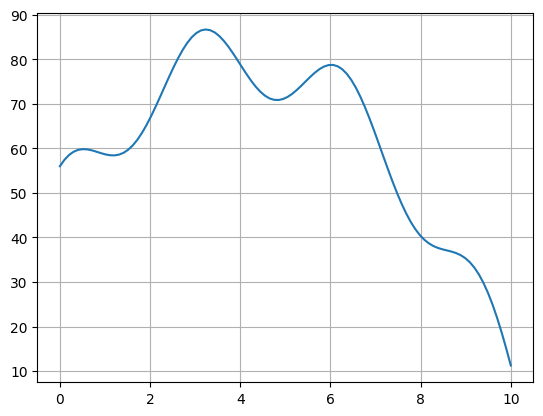

In [21]:
N_point = 100
x0 = 0
x1 = 10
xx = np.linspace(x0, x1, N_point)
yy = lambda xx: 8*np.cos(2*xx) -2*(xx-4)**2+80


# a0, a1, a2, a3 =50, 2, 2, 3
# b1, b2, b3 = 2, 5, 3
# yy = lambda xx: a0+ a1*(xx-b1) + a2*(xx-b2)**2+ a3*(xx-b3)**3

plt.plot(xx, yy(xx))
plt.grid()

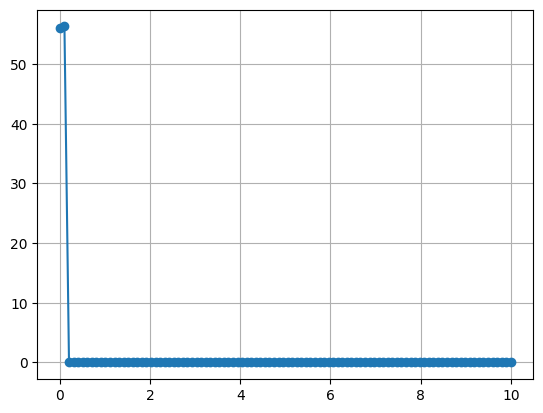

In [22]:
x = MyInputNeuron(0)

list_neuron = []
width = []

neuro_point = 2*N_point
eps = (x1-x0)/neuro_point
step = 2*eps

for i_step in range(neuro_point):
    s = step*i_step+x0
    relu1 = MyNeuron([x])
    relu1.set_width([1], s-eps)
    
    relu2 = MyNeuron([x])
    relu2.set_width([1], s)
    
    relu3 = MyNeuron([x])
    relu3.set_width([1], s+eps)
    
    list_neuron.append(relu1)
    list_neuron.append(relu2)
    list_neuron.append(relu3)

    h = yy(s)/eps
    
    width.append(h)
    width.append(-h)
    width.append(-h)
    
approx_fun = MyNeuron(list_neuron)


approx_fun.set_width(width, 0.0)
yn = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yn[i] = approx_fun.get_sign()

plt.plot(xx, yn, "-o")
plt.grid()

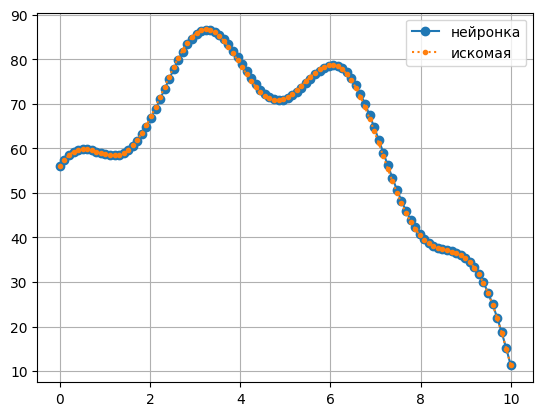

In [23]:
x = MyInputNeuron(0)

list_neuron = []
width = []

neuro_point = 2*N_point
eps = (x1-x0)/neuro_point
step = 2*eps

for i_step in range(neuro_point):
    s = step*i_step+x0
    relu1 = MyNeuron([x])
    relu1.set_width([1], s-eps)
    
    relu2 = MyNeuron([x])
    relu2.set_width([1], s)
    
    relu3 = MyNeuron([x])
    relu3.set_width([1], s+eps)
    
    relu4 = MyNeuron([x])
    relu4.set_width([1], s+2*eps)
    
    list_neuron.append(relu1)
    list_neuron.append(relu2)
    list_neuron.append(relu3)
    list_neuron.append(relu4)

    h = yy(s)/eps
    
    width.append(h)
    width.append(-h)
    width.append(-h)
    width.append(h)
    
approx_fun = MyNeuron(list_neuron)


approx_fun.set_width(width, 0.0)
yn = np.zeros_like(xx)

for i, xi in enumerate(xx):
    x.sign = xi
    yn[i] = approx_fun.get_sign()

plt.plot(xx, yn, "-o")
plt.plot(xx, yy(xx), ":.")
plt.legend(["нейронка", "искомая"])
plt.grid()

In [24]:
neuro_point

200